# Statistic 12-04-2017

In [1]:
import pickle       # (De-) Serialization
%pylab inline       
import pylab as plt # plot
import pandas

Populating the interactive namespace from numpy and matplotlib


## Used TestFiles

In [2]:
testfiles = [f.split('/')[-1][2:] for f in pickle.load(open('./test_files.pkl','rb'))]

In [3]:
testfiles

['00000005547528',
 '00000005592221',
 '00000005567787',
 '07010000421348',
 '07010000450165',
 '00000005592274',
 '00000005576654',
 '07010000450102',
 '00000005571859',
 '00000005558159',
 '07010000442968',
 '07010000450161',
 '07010000451121',
 '00000005587658',
 '00000005578826',
 '07010000441115',
 '07010000452735',
 '00000005558233',
 '07010000439067',
 '07010000430666',
 '00000005547263',
 '00000005535447',
 '00000005558169',
 '00000005592234',
 '00000005587989',
 '00000005556804',
 '00000005558020',
 '07010000452706',
 '00000005558143',
 '00000005558486',
 '00000005542953',
 '00000005571472',
 '00000005566722',
 '00000005558522',
 '00000005563748',
 '00000005556895',
 '07010000455491',
 '07010000415474',
 '00000005577182',
 '07010000404403',
 '07010000423610',
 '00000005535614',
 '07010000449802',
 '00000005557653',
 '07010000415460',
 '00000005578594',
 '00000005592571',
 '07010000404634',
 '00000005571511',
 '07010000441101',
 '00000005557484',
 '00000005591279',
 '0701000043

## Data

In [4]:
predicted = pickle.load(open('./predicted.pkl', 'rb'))

In [5]:
real = pickle.load(open('./real.pkl', 'rb'))

## Scoring per File

In [6]:
db = pickle.load(open('./databuilder.pkl', 'rb'))

In [7]:
from sklearn import metrics

For Definition of accuracy, f1-score, precision and recall see http://scikit-learn.org/stable/modules/model_evaluation.html

In [8]:
res = []
for i in range(len(predicted)):
    r = real[i]
    p = predicted[i]
    l = np.unique(real[0])
    acc = metrics.accuracy_score(y_true=r, y_pred=p)
    f1 = metrics.f1_score(labels=l, y_true=r, y_pred=p, average=None) # average=None -> get score for each label
    prec = metrics.precision_score(labels=l, y_true=r, y_pred=p, average=None)
    rec = metrics.recall_score(labels=l, y_true=r, y_pred=p, average=None)
    
    f1_all = np.ones(len(db.labels))*(-1)
    f1_all[l] = f1
    prec_all = np.ones(len(db.labels))*(-1)
    prec_all[l] = prec
    rec_all = np.ones(len(db.labels))*(-1)
    rec_all[l] = rec
    res.append([acc, np.mean(f1), np.mean(prec), np.mean(rec), *f1_all, *prec_all, *rec_all])
res = np.array(res)

C:\Keil_Programme\anaconda4\envs\tensor\lib\site-packages\sklearn\metrics\classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Keil_Programme\anaconda4\envs\tensor\lib\site-packages\sklearn\metrics\classification.py:1113: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Keil_Programme\anaconda4\envs\tensor\lib\site-packages\sklearn\metrics\classification.py:1115: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
C:\Keil_Programme\anaconda4\envs\tensor\lib\site-packages\sklearn\metrics\classification.py:1115: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


- Warning occurs because some labels are not in the document, so it is dividing by zero
- to get a value per label, these labels which aren't in the document there is a **-1**

In [9]:
score_labels = lambda x : ['{}_{}'.format(x, l) for l in db.labels]

In [10]:
cols = ['accuracy', 'mean(f1)', 'mean(prec)', 'mean(recall)', *score_labels('f1'), *score_labels('precision'), *score_labels('recall')]

In [11]:
pd = pandas.concat((pandas.DataFrame(testfiles, columns=['files']), pandas.DataFrame(res, columns=[cols])), 1)

In [12]:
pd

,files,accuracy,mean(f1),mean(prec),mean(recall),f1_BU-E-MAIL,f1_BU-NAME-VERSAND,f1_BU-ORT,f1_BU-PLZ,f1_BU-STRASSE,...,recall_ProvisionBrutto,recall_ProvisionNetto,recall_ProvisionSteuerfrei,recall_ProvisionSteuern,recall_Rechnungsnr.,recall_Reisedatum,recall_Reisender,recall_ReisepreisBrutto,recall_ReisepreisNetto,recall_Ver-Kdnr
0,00000005547528,0.894737,0.565407,0.508012,0.721008,-1.0,1.000000,0.666667,1.000000,0.571429,...,1.0,0.000000,-1.0,0.000000,-1.0,-1.0,-1.0,1.000000,-1.0,0.0
1,00000005592221,0.875969,0.644758,0.559456,0.933737,-1.0,1.000000,0.333333,1.000000,0.250000,...,1.0,1.000000,-1.0,1.000000,-1.0,-1.0,-1.0,1.000000,-1.0,1.0
2,00000005567787,0.768786,0.466821,0.473678,0.490904,-1.0,0.800000,0.461538,1.000000,0.000000,...,0.0,1.000000,-1.0,1.000000,-1.0,-1.0,-1.0,0.500000,-1.0,0.0
3,07010000421348,0.884766,0.431598,0.357072,0.699037,-1.0,0.222222,0.500000,1.000000,0.400000,...,0.0,1.000000,-1.0,1.000000,-1.0,-1.0,-1.0,1.000000,-1.0,0.0
4,07010000450165,0.781421,0.163428,0.138000,0.423693,-1.0,0.228571,0.000000,0.500000,0.080000,...,0.0,0.500000,-1.0,1.000000,-1.0,-1.0,-1.0,0.000000,-1.0,0.0
5,00000005592274,0.926554,0.699272,0.625000,0.909938,-1.0,0.666667,0.400000,1.000000,0.666667,...,1.0,1.000000,-1.0,1.000000,-1.0,-1.0,-1.0,1.000000,-1.0,1.0
6,00000005576654,0.769697,0.523876,0.545238,0.688520,-1.0,0.571429,0.500000,1.000000,0.250000,...,0.0,0.333333,-1.0,0.666667,-1.0,-1.0,-1.0,1.000000,-1.0,1.0
7,07010000450102,0.917148,0.529009,0.416486,0.798570,-1.0,0.750000,0.666667,0.666667,0.571429,...,0.0,1.000000,-1.0,1.000000,-1.0,-1.0,-1.0,1.000000,-1.0,1.0
8,00000005571859,0.751880,0.342593,0.314856,0.481250,-1.0,1.000000,0.500000,1.000000,0.000000,...,0.0,0.000000,-1.0,1.000000,-1.0,-1.0,-1.0,0.000000,-1.0,0.0
9,00000005558159,0.888095,0.634926,0.531903,0.948579,-1.0,0.333333,0.400000,0.800000,0.400000,...,1.0,1.000000,-1.0,1.000000,-1.0,-1.0,-1.0,1.000000,-1.0,1.0


- **-1** is not in the document
- **mean of score** is without -1

In [13]:
pd.to_csv('scoring_per_file.csv', sep=';', index=False)

In [14]:
from collections import Counter

In [15]:
c = Counter()

In [16]:
for i in range(len(real)):
    c.update(real[i])

In [17]:
tmp = []
for k in c.keys():
    tmp.append((db.labels[k], c[k]))
pandas.DataFrame(tmp, columns=['Label', 'Count'])

,Label,Count
0,BU-E-MAIL,5
1,BU-NAME-VERSAND,430
2,BU-ORT,278
3,BU-PLZ,230
4,BU-STRASSE,499
5,Fällig am,133
6,MWSTProzent,204
7,NAME,240
8,NONE,62790
9,ProvisionBrutto,130


## Score About ALL Test Files

In [18]:
predicted_all_test_files = np.concatenate(predicted)
real_all_test_files = np.concatenate(real)

### <font style="color:red">Precision for all test Files<font>

In [19]:
precision_per_label = metrics.precision_score(y_true=real_all_test_files, y_pred=predicted_all_test_files, average=None)
np.mean(precision_per_label)

0.30845925713170674

### <font style="color:red">Recall for all test Files<font>

In [20]:
recall_per_label = metrics.recall_score(y_true=real_all_test_files, y_pred=predicted_all_test_files, average=None)
np.mean(recall_per_label)

0.79570319953971913

### <font style="color:red">F1 Score for all test Files<font>

In [21]:
f1_per_label = metrics.f1_score(y_true=real_all_test_files, y_pred=predicted_all_test_files, average=None)
np.mean(f1_per_label)

0.4218611929057281

### Confusion Matrix

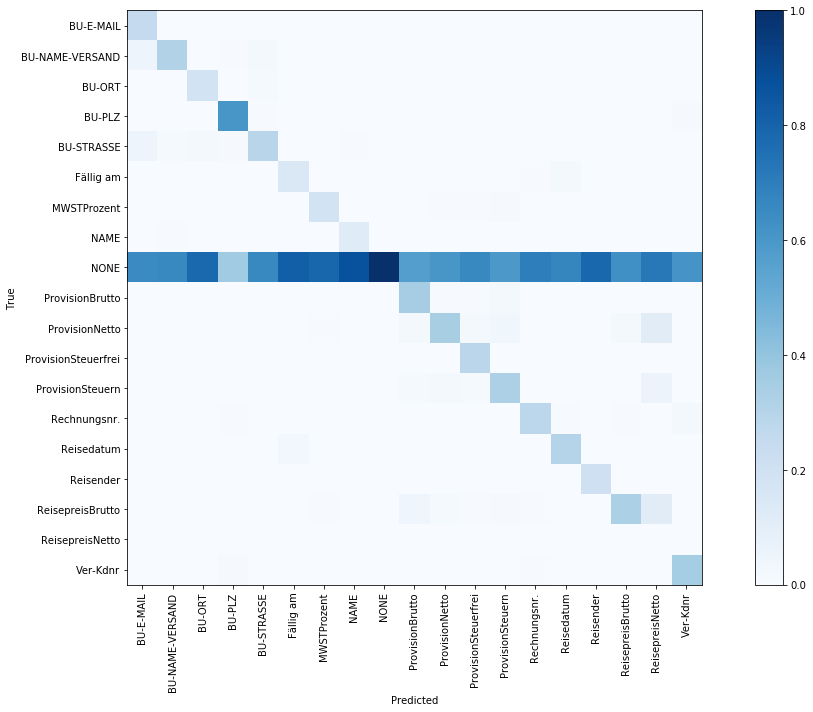

In [22]:
cc = metrics.confusion_matrix(real_all_test_files, predicted_all_test_files)
cc = cc / np.sum(cc, 0)
plt.figure(figsize=(15, 10))

plt.imshow(cc, cmap=plt.cm.Blues, vmin=0, vmax=1)
plt.colorbar()
plt.xticks(np.arange(len(db.labels)), db.labels, rotation=90)
plt.yticks(np.arange(len(db.labels)), db.labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.tight_layout()

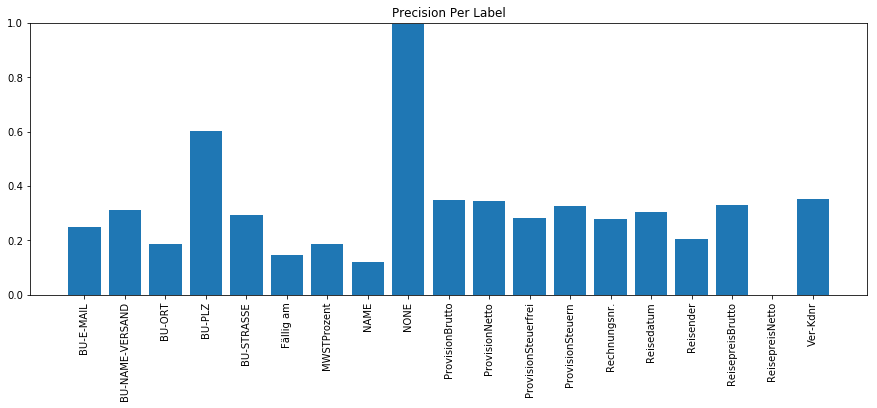

In [23]:
plt.figure(figsize=(15,5))
plt.bar(range(len(precision_per_label)), precision_per_label)
plt.ylim(0,1)
plt.xticks(np.arange(len(db.labels)), db.labels, rotation=90)
plt.title('Precision Per Label')

In [24]:
pandas.DataFrame(np.transpose([db.labels, precision_per_label]), columns=['Label', 'Precision'])

,Label,Precision
0,BU-E-MAIL,0.25
1,BU-NAME-VERSAND,0.312878
2,BU-ORT,0.185154
3,BU-PLZ,0.602817
4,BU-STRASSE,0.292576
5,Fällig am,0.146143
6,MWSTProzent,0.184865
7,NAME,0.120436
8,NONE,0.994033
9,ProvisionBrutto,0.348243


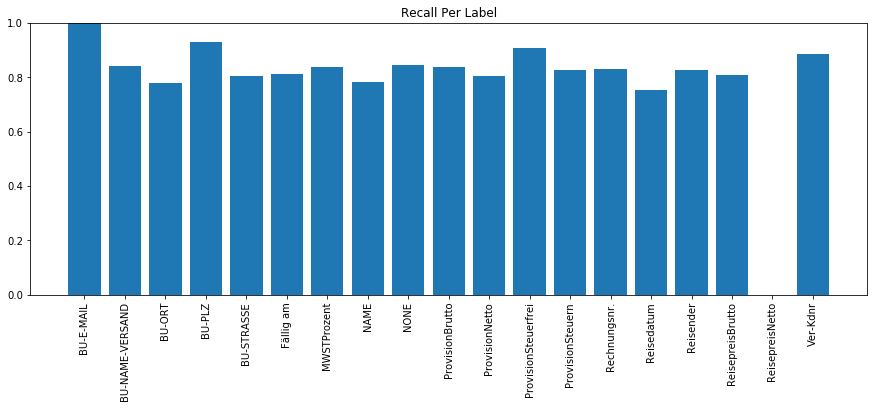

In [25]:
plt.figure(figsize=(15,5))
plt.bar(range(len(recall_per_label)), recall_per_label)
plt.ylim(0,1)
plt.xticks(np.arange(len(db.labels)), db.labels, rotation=90)
plt.title('Recall Per Label')

In [26]:
pandas.DataFrame(np.transpose([db.labels, recall_per_label]), columns=['Label', 'Recall'])

,Label,Recall
0,BU-E-MAIL,1
1,BU-NAME-VERSAND,0.84186
2,BU-ORT,0.780576
3,BU-PLZ,0.930435
4,BU-STRASSE,0.805611
5,Fällig am,0.81203
6,MWSTProzent,0.838235
7,NAME,0.783333
8,NONE,0.846297
9,ProvisionBrutto,0.838462


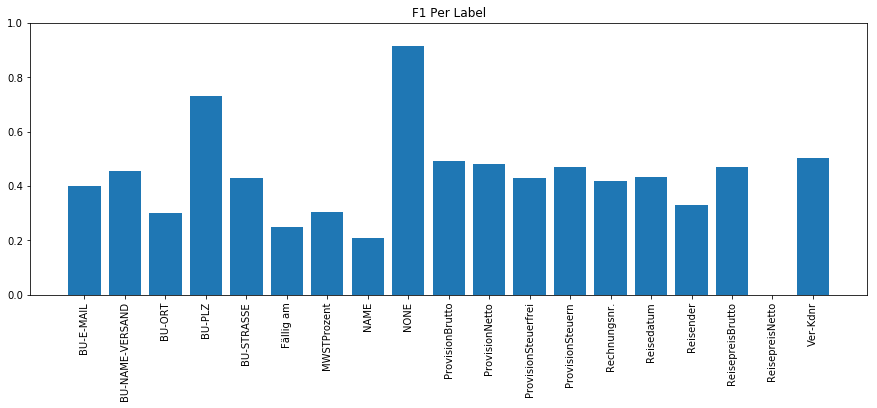

In [27]:
plt.figure(figsize=(15,5))
plt.bar(range(len(f1_per_label)), f1_per_label)
plt.ylim(0,1)
plt.xticks(np.arange(len(db.labels)), db.labels, rotation=90)
plt.title('F1 Per Label')

In [28]:
pandas.DataFrame(np.transpose([db.labels, f1_per_label]), columns=['Label', 'F1'])

,Label,F1
0,BU-E-MAIL,0.4
1,BU-NAME-VERSAND,0.456207
2,BU-ORT,0.29931
3,BU-PLZ,0.731624
4,BU-STRASSE,0.429258
5,Fällig am,0.247706
6,MWSTProzent,0.302923
7,NAME,0.208773
8,NONE,0.914235
9,ProvisionBrutto,0.492099
